In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_weather_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city.replace(" ","+") + "&appid=" + weather_api_key5555545
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | el nido
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | trail
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | argo
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | mwinilunga
Processing Record 14 of Set 1 | carbonear
Processing Record 15 of Set 1 | howrah
Processing Record 16 of Set 1 | mega
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | chernyshevsk
Processing Record 20 of Set 1 | tupaciguara
Processing Record 21 of Set 1 | al bura

Processing Record 38 of Set 4 | puerto natales
Processing Record 39 of Set 4 | mandan
Processing Record 40 of Set 4 | guilin
Processing Record 41 of Set 4 | hadibu
Processing Record 42 of Set 4 | svetlograd
Processing Record 43 of Set 4 | bakchar
Processing Record 44 of Set 4 | strathalbyn
Processing Record 45 of Set 4 | coyah
Processing Record 46 of Set 4 | kaa-khem
Processing Record 47 of Set 4 | nkurenkuru
City not found. Skipping...
Processing Record 48 of Set 4 | cidade velha
Processing Record 49 of Set 4 | papao
Processing Record 0 of Set 5 | melekeok village
Processing Record 1 of Set 5 | maintirano
Processing Record 2 of Set 5 | basudebpur
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | yemva
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | handan
Processing Record 7 of Set 5 | la palma
Processing Record 8 of Set 5 | douglas
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | tsiombe
Processing Reco

Processing Record 31 of Set 8 | sherwood park
Processing Record 32 of Set 8 | nchelenge
Processing Record 33 of Set 8 | chul'man
Processing Record 34 of Set 8 | capelinha
Processing Record 35 of Set 8 | nova sintra
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | baturaja
Processing Record 38 of Set 8 | melong
Processing Record 39 of Set 8 | waddan
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | holualoa
Processing Record 42 of Set 8 | chabahar
Processing Record 43 of Set 8 | nuku'alofa
Processing Record 44 of Set 8 | formosa do rio preto
Processing Record 45 of Set 8 | san juan de miraflores
Processing Record 46 of Set 8 | merizo village
Processing Record 47 of Set 8 | tangalle
Processing Record 48 of Set 8 | villa mercedes
Processing Record 49 of Set 8 | utrik
Processing Record 0 of Set 9 | sebastopol
Processing Record 1 of Set 9 | unai
Processing Record 2 of Set 9 | tindouf
Processing Record 3 of Set 9 | banswara
Processing Record 4 of Se

Processing Record 22 of Set 12 | charters towers
Processing Record 23 of Set 12 | fairview
Processing Record 24 of Set 12 | aracoiaba
Processing Record 25 of Set 12 | kendari
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | shingu
Processing Record 28 of Set 12 | barkly west
Processing Record 29 of Set 12 | chiredzi
Processing Record 30 of Set 12 | kalmunai
Processing Record 31 of Set 12 | myitkyina
Processing Record 32 of Set 12 | san nicolas
Processing Record 33 of Set 12 | gaspe
Processing Record 34 of Set 12 | shenjiamen
Processing Record 35 of Set 12 | san jose de jachal
Processing Record 36 of Set 12 | saeby
Processing Record 37 of Set 12 | motueka
Processing Record 38 of Set 12 | kristiansund
Processing Record 39 of Set 12 | krasnyy chikoy
Processing Record 40 of Set 12 | pallasovka
Processing Record 41 of Set 12 | zabol
Processing Record 42 of Set 12 | klaksvik
Processing Record 43 of Set 12 | kokubu-matsuki
Processing Record 44 of Set 12 | ballina
Proc

In [28]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather_data)


# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,300.37,80,99,1.55,ID,1682680623
1,tazovsky,67.4667,78.7000,266.89,91,82,7.62,RU,1682680623
2,fale old settlement,-9.3852,-171.2468,302.07,75,68,9.18,TK,1682680624
3,port-aux-francais,-49.3500,70.2167,279.32,70,20,10.15,TF,1682680624
4,el nido,11.1858,119.3956,301.63,76,16,4.77,PH,1682680624


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,300.37,80,99,1.55,ID,1682680623
1,tazovsky,67.4667,78.7000,266.89,91,82,7.62,RU,1682680623
2,fale old settlement,-9.3852,-171.2468,302.07,75,68,9.18,TK,1682680624
3,port-aux-francais,-49.3500,70.2167,279.32,70,20,10.15,TF,1682680624
4,el nido,11.1858,119.3956,301.63,76,16,4.77,PH,1682680624


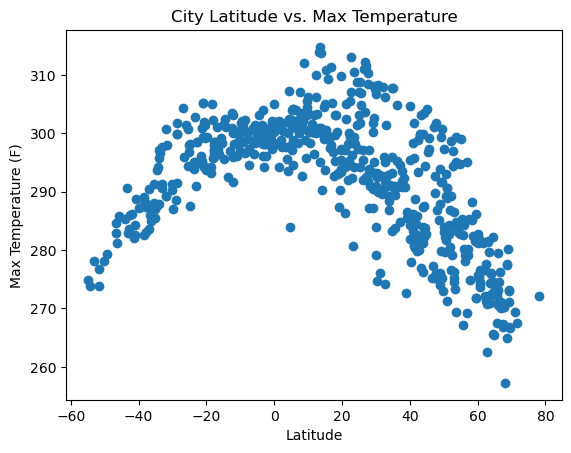

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

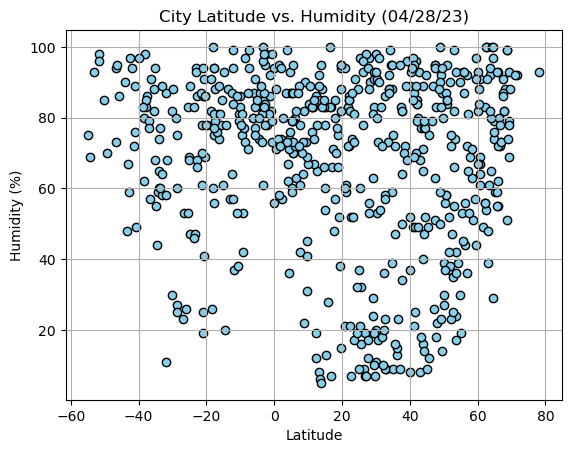

In [36]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

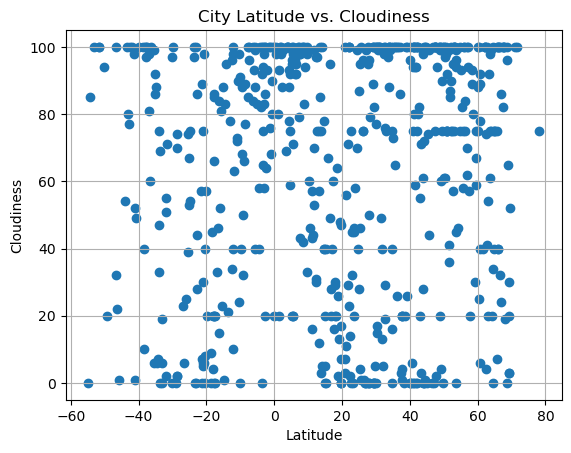

In [37]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

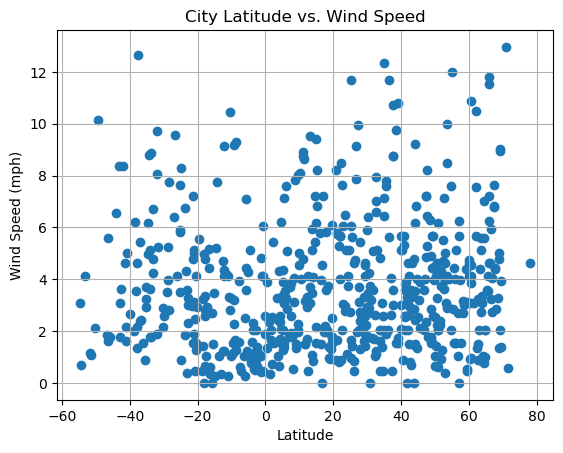

In [38]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [39]:
# Define a function to create Linear Regression plots
plot_linear_regression=(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature")
plot_linear_regression

(City_ID
 0       2.4803
 1      67.4667
 2      -9.3852
 3     -49.3500
 4      11.1858
         ...   
 590    27.1935
 591    19.5167
 592    14.5425
 593   -39.8142
 594    50.9333
 Name: Lat, Length: 595, dtype: float64,
 City_ID
 0      300.37
 1      266.89
 2      302.07
 3      279.32
 4      301.63
         ...  
 590    311.56
 591    290.31
 592    304.53
 593    287.20
 594    290.70
 Name: Max Temp, Length: 595, dtype: float64,
 'Latitude',
 'Max Temperature')

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,300.37,80,99,1.55,ID,1682680623
1,tazovsky,67.4667,78.7000,266.89,91,82,7.62,RU,1682680623
4,el nido,11.1858,119.3956,301.63,76,16,4.77,PH,1682680624
5,thinadhoo,0.5333,72.9333,301.98,71,98,3.91,MV,1682680624
6,trail,49.0998,-117.7022,279.80,92,60,1.57,CA,1682680625


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fale old settlement,-9.3852,-171.2468,302.07,75,68,9.18,TK,1682680624
3,port-aux-francais,-49.3500,70.2167,279.32,70,20,10.15,TF,1682680624
7,blackmans bay,-43.0167,147.3167,282.89,67,80,3.10,AU,1682680626
11,mwinilunga,-11.7358,24.4293,298.21,37,63,4.22,ZM,1682680627
15,waitangi,-43.9535,-176.5597,285.27,90,54,6.56,NZ,1682680628


In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE